In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
moutai = pd.read_csv("moutai_cleaned.csv", index_col=0)
moutai

,Open,High,Low,Close,Adj Close,Volume,smoothed_price,RSI,%K,%R,MACD,Signal Line,PROC,OBV,Label
Date,,,,,,,,,,,,,,,
2001-09-14,7.166466,7.263983,7.124674,7.224180,5.560975,3855436.0,5.498359,52.453651,17.916430,-82.083570,0.022033,0.037614,0.009080,-123595084.0,-1.0
2001-09-17,7.180397,7.222190,7.064970,7.132634,5.490505,4514257.0,5.560132,55.341492,34.130613,-65.869387,0.019902,0.034072,0.020935,-119080827.0,-1.0
2001-09-18,7.140595,7.273934,7.134624,7.214230,5.553315,5413338.0,5.491443,41.864782,8.651853,-91.348147,0.012526,0.029763,-0.027041,-124494165.0,-1.0
2001-09-19,7.224180,7.347568,7.176417,7.347568,5.655955,4346710.0,5.552482,48.832246,31.293020,-68.706980,0.011474,0.026105,-0.003893,-120147455.0,-1.0
2001-09-20,7.343588,7.373440,7.263983,7.285874,5.608464,5614375.0,5.654562,48.511069,69.157243,-30.842757,0.018662,0.024616,-0.004839,-114533080.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,1664.989990,1664.989990,1594.719971,1595.000000,1595.000000,5402037.0,1664.473541,46.750191,46.460032,-53.539968,-73.373943,-77.728874,-0.020518,602902665.0,1.0
2021-08-27,1589.000000,1625.000000,1584.099976,1596.030029,1596.030029,3609545.0,1595.935481,43.462614,18.891555,-81.108445,-72.410283,-76.665156,-0.045140,599293120.0,1.0
2021-08-30,1605.000000,1613.000000,1545.949951,1586.000000,1586.000000,5158770.0,1596.028756,41.219172,18.929073,-81.070927,-70.822649,-75.496655,-0.057555,604451890.0,1.0


In [3]:
moutai = moutai.drop(columns=["Open", "High", "Low", "Close", "Signal Line"])
moutai

,Adj Close,Volume,smoothed_price,RSI,%K,%R,MACD,PROC,OBV,Label
Date,,,,,,,,,,
2001-09-14,5.560975,3855436.0,5.498359,52.453651,17.916430,-82.083570,0.022033,0.009080,-123595084.0,-1.0
2001-09-17,5.490505,4514257.0,5.560132,55.341492,34.130613,-65.869387,0.019902,0.020935,-119080827.0,-1.0
2001-09-18,5.553315,5413338.0,5.491443,41.864782,8.651853,-91.348147,0.012526,-0.027041,-124494165.0,-1.0
2001-09-19,5.655955,4346710.0,5.552482,48.832246,31.293020,-68.706980,0.011474,-0.003893,-120147455.0,-1.0
2001-09-20,5.608464,5614375.0,5.654562,48.511069,69.157243,-30.842757,0.018662,-0.004839,-114533080.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
2021-08-26,1595.000000,5402037.0,1664.473541,46.750191,46.460032,-53.539968,-73.373943,-0.020518,602902665.0,1.0
2021-08-27,1596.030029,3609545.0,1595.935481,43.462614,18.891555,-81.108445,-72.410283,-0.045140,599293120.0,1.0
2021-08-30,1586.000000,5158770.0,1596.028756,41.219172,18.929073,-81.070927,-70.822649,-0.057555,604451890.0,1.0


In [4]:
# number of rows in the training set
train_idx = int(np.ceil(moutai.shape[0] * 0.7))
train_idx

3343

In [5]:
train = moutai.iloc[:train_idx, :]
train

,Adj Close,Volume,smoothed_price,RSI,%K,%R,MACD,PROC,OBV,Label
Date,,,,,,,,,,
2001-09-14,5.560975,3855436.0,5.498359,52.453651,17.916430,-82.083570,0.022033,0.009080,-123595084.0,-1.0
2001-09-17,5.490505,4514257.0,5.560132,55.341492,34.130613,-65.869387,0.019902,0.020935,-119080827.0,-1.0
2001-09-18,5.553315,5413338.0,5.491443,41.864782,8.651853,-91.348147,0.012526,-0.027041,-124494165.0,-1.0
2001-09-19,5.655955,4346710.0,5.552482,48.832246,31.293020,-68.706980,0.011474,-0.003893,-120147455.0,-1.0
2001-09-20,5.608464,5614375.0,5.654562,48.511069,69.157243,-30.842757,0.018662,-0.004839,-114533080.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
2015-10-13,182.337418,1575113.0,181.727053,43.057540,55.049353,-44.950647,-0.896072,-0.019458,613700688.0,1.0
2015-10-14,181.502533,1521339.0,182.329199,39.066869,92.619313,-7.380687,-0.588310,-0.028285,615222027.0,1.0
2015-10-15,183.484268,1655013.0,181.513664,49.412900,82.983839,-17.016161,-0.405539,-0.001240,613567014.0,1.0


In [6]:
test = moutai.iloc[train_idx:, :]
test

,Adj Close,Volume,smoothed_price,RSI,%K,%R,MACD,PROC,OBV,Label
Date,,,,,,,,,,
2015-10-20,185.300827,1478429.0,185.964363,57.042414,100.000000,-0.000000,0.564527,0.017177,619581431.0,1.0
2015-10-21,183.777847,2234914.0,185.309762,67.535383,94.295095,-5.704905,0.797672,0.036957,617346517.0,1.0
2015-10-22,185.814621,2372030.0,183.798475,64.769599,81.124092,-18.875908,0.850687,0.032586,614974487.0,1.0
2015-10-23,193.567200,5627734.0,185.787473,69.614029,98.458392,-1.541608,1.041195,0.046690,620602221.0,1.0
2015-10-26,199.760117,4334626.0,193.462444,83.166939,100.000000,-0.000000,1.790837,0.101655,624936847.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-08-26,1595.000000,5402037.0,1664.473541,46.750191,46.460032,-53.539968,-73.373943,-0.020518,602902665.0,1.0
2021-08-27,1596.030029,3609545.0,1595.935481,43.462614,18.891555,-81.108445,-72.410283,-0.045140,599293120.0,1.0
2021-08-30,1586.000000,5158770.0,1596.028756,41.219172,18.929073,-81.070927,-70.822649,-0.057555,604451890.0,1.0


In [7]:
X_train = train[["RSI", "%K", "%R", "MACD", "PROC", "OBV"]]
X_train

,RSI,%K,%R,MACD,PROC,OBV
Date,,,,,,
2001-09-14,52.453651,17.916430,-82.083570,0.022033,0.009080,-123595084.0
2001-09-17,55.341492,34.130613,-65.869387,0.019902,0.020935,-119080827.0
2001-09-18,41.864782,8.651853,-91.348147,0.012526,-0.027041,-124494165.0
2001-09-19,48.832246,31.293020,-68.706980,0.011474,-0.003893,-120147455.0
2001-09-20,48.511069,69.157243,-30.842757,0.018662,-0.004839,-114533080.0
...,...,...,...,...,...,...
2015-10-13,43.057540,55.049353,-44.950647,-0.896072,-0.019458,613700688.0
2015-10-14,39.066869,92.619313,-7.380687,-0.588310,-0.028285,615222027.0
2015-10-15,49.412900,82.983839,-17.016161,-0.405539,-0.001240,613567014.0


In [8]:
Y_train = train["Label"]
Y_train

Date
2001-09-14   -1.0
2001-09-17   -1.0
2001-09-18   -1.0
2001-09-19   -1.0
2001-09-20   -1.0
             ... 
2015-10-13    1.0
2015-10-14    1.0
2015-10-15    1.0
2015-10-16    1.0
2015-10-19    1.0
Name: Label, Length: 3343, dtype: float64

In [45]:
# ss = MinMaxScaler()

In [46]:
# X_train = ss.fit_transform(X_train)
# X_train

array([[0.53079718, 0.1791643 , 0.1791643 , 0.38049268, 0.24902318,
        0.04878038],
       [0.56117283, 0.34130613, 0.34130613, 0.38039837, 0.2598376 ,
        0.05399674],
       [0.41941858, 0.08651853, 0.08651853, 0.38007193, 0.21607222,
        0.04774147],
       ...,
       [0.49881316, 0.82983839, 0.82983839, 0.36156899, 0.23960863,
        0.90059372],
       [0.5182917 , 1.        , 1.        , 0.37497492, 0.24325187,
        0.90281678],
       [0.53856373, 1.        , 1.        , 0.38801901, 0.24727593,
        0.90583519]])

In [9]:
X_test = test[["RSI", "%K", "%R", "MACD", "PROC", "OBV"]]
X_test

,RSI,%K,%R,MACD,PROC,OBV
Date,,,,,,
2015-10-20,57.042414,100.000000,-0.000000,0.564527,0.017177,619581431.0
2015-10-21,67.535383,94.295095,-5.704905,0.797672,0.036957,617346517.0
2015-10-22,64.769599,81.124092,-18.875908,0.850687,0.032586,614974487.0
2015-10-23,69.614029,98.458392,-1.541608,1.041195,0.046690,620602221.0
2015-10-26,83.166939,100.000000,-0.000000,1.790837,0.101655,624936847.0
...,...,...,...,...,...,...
2021-08-26,46.750191,46.460032,-53.539968,-73.373943,-0.020518,602902665.0
2021-08-27,43.462614,18.891555,-81.108445,-72.410283,-0.045140,599293120.0
2021-08-30,41.219172,18.929073,-81.070927,-70.822649,-0.057555,604451890.0


In [47]:
# X_test = ss.transform(X_test)
# X_test

array([[ 0.5790639 ,  1.        ,  1.        ,  0.40450264,  0.25640873,
         0.90754356],
       [ 0.68943379,  0.94295095,  0.94295095,  0.41482131,  0.27445283,
         0.90496105],
       [ 0.66034199,  0.81124092,  0.81124092,  0.41716767,  0.27046556,
         0.90222009],
       ...,
       [ 0.41262775,  0.18929073,  0.18929073, -2.75498606,  0.18823576,
         0.89006091],
       [ 0.26367481,  0.18383962,  0.18383962, -2.69914399,  0.13343568,
         0.88501389],
       [ 0.27570535,  0.0623379 ,  0.0623379 , -2.71830441,  0.14032565,
         0.87607978]])

In [10]:
# initialize LR
lr = LogisticRegression()

In [11]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [12]:
lr.coef_

array([[ 4.14755839e-16,  4.99572186e-16, -1.30759822e-16,
         3.09103151e-18,  4.02428083e-19,  4.33020615e-10]])

In [13]:
Y_test = test["Label"]
Y_test

Date
2015-10-20    1.0
2015-10-21    1.0
2015-10-22    1.0
2015-10-23    1.0
2015-10-26    1.0
             ... 
2021-08-26    1.0
2021-08-27    1.0
2021-08-30    1.0
2021-08-31    1.0
2021-09-01    1.0
Name: Label, Length: 1432, dtype: float64

In [14]:
lr_y_predict = lr.predict(X_test)
lr_y_predict

array([1., 1., 1., ..., 1., 1., 1.])

In [15]:
sum(lr_y_predict == 1)

1432

In [16]:
lr.score(X_test, Y_test)

0.6857541899441341

In [18]:
y_pred_proba = lr.predict_proba(X_test)[::,1]

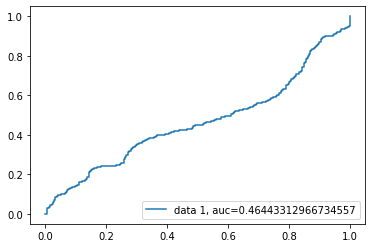

In [19]:
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Wuliangye

In [21]:
wuliangye = pd.read_csv("wuliangye_cleaned.csv", index_col=0)
wuliangye

,Open,High,Low,Close,Adj Close,Volume,smoothed_price,RSI,%K,%R,MACD,Signal Line,PROC,OBV,Label
Date,,,,,,,,,,,,,,,
1998-05-18,5.835667,5.835667,5.613014,5.665086,4.228840,8195534.0,4.284466,74.712935,77.478143,-22.521857,0.192351,0.161890,0.193387,2.490974e+08,-1.0
1998-05-19,5.611218,5.745888,5.521439,5.595956,4.177237,12222511.0,4.228840,71.867729,71.428478,-28.571522,0.183741,0.166260,0.177898,2.368749e+08,-1.0
1998-05-20,5.566329,5.593262,5.463082,5.466673,4.080731,10266708.0,4.177237,68.550532,65.816339,-34.183661,0.170784,0.167165,0.150212,2.266082e+08,-1.0
1998-05-21,5.413703,5.674064,5.413703,5.567226,4.155791,8600805.0,4.080731,66.874154,54.151080,-45.848920,0.150989,0.163929,0.142402,2.180074e+08,-1.0
1998-05-22,5.575307,5.656108,5.530417,5.610321,4.187959,9204784.0,4.155791,67.970732,37.374964,-62.625036,0.139746,0.159093,0.155825,2.272122e+08,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,217.369995,217.369995,206.000000,207.169998,207.169998,33228274.0,217.500000,44.254309,26.738233,-73.261767,-12.818047,-11.915239,-0.042567,1.272652e+10,1.0
2021-08-27,207.160004,210.000000,204.500000,205.679993,205.679993,27190967.0,207.169998,39.909978,2.636503,-97.363497,-13.159159,-12.164023,-0.083319,1.269932e+10,1.0
2021-08-30,208.500000,209.990005,199.460007,207.000000,207.000000,34732935.0,205.679993,36.600950,0.000000,-100.000000,-13.395311,-12.410280,-0.105778,1.266459e+10,1.0


In [22]:
wuliangye = wuliangye.drop(columns=["Open", "High", "Low", "Close", "Signal Line"])
wuliangye

,Adj Close,Volume,smoothed_price,RSI,%K,%R,MACD,PROC,OBV,Label
Date,,,,,,,,,,
1998-05-18,4.228840,8195534.0,4.284466,74.712935,77.478143,-22.521857,0.192351,0.193387,2.490974e+08,-1.0
1998-05-19,4.177237,12222511.0,4.228840,71.867729,71.428478,-28.571522,0.183741,0.177898,2.368749e+08,-1.0
1998-05-20,4.080731,10266708.0,4.177237,68.550532,65.816339,-34.183661,0.170784,0.150212,2.266082e+08,-1.0
1998-05-21,4.155791,8600805.0,4.080731,66.874154,54.151080,-45.848920,0.150989,0.142402,2.180074e+08,-1.0
1998-05-22,4.187959,9204784.0,4.155791,67.970732,37.374964,-62.625036,0.139746,0.155825,2.272122e+08,-1.0
...,...,...,...,...,...,...,...,...,...,...
2021-08-26,207.169998,33228274.0,217.500000,44.254309,26.738233,-73.261767,-12.818047,-0.042567,1.272652e+10,1.0
2021-08-27,205.679993,27190967.0,207.169998,39.909978,2.636503,-97.363497,-13.159159,-0.083319,1.269932e+10,1.0
2021-08-30,207.000000,34732935.0,205.679993,36.600950,0.000000,-100.000000,-13.395311,-0.105778,1.266459e+10,1.0


In [23]:
# number of rows in the training set
train_idx = int(np.ceil(wuliangye.shape[0] * 0.7))
train_idx

3874

In [24]:
train = wuliangye.iloc[:train_idx, :]
train

,Adj Close,Volume,smoothed_price,RSI,%K,%R,MACD,PROC,OBV,Label
Date,,,,,,,,,,
1998-05-18,4.228840,8195534.0,4.284466,74.712935,77.478143,-22.521857,0.192351,0.193387,2.490974e+08,-1.0
1998-05-19,4.177237,12222511.0,4.228840,71.867729,71.428478,-28.571522,0.183741,0.177898,2.368749e+08,-1.0
1998-05-20,4.080731,10266708.0,4.177237,68.550532,65.816339,-34.183661,0.170784,0.150212,2.266082e+08,-1.0
1998-05-21,4.155791,8600805.0,4.080731,66.874154,54.151080,-45.848920,0.150989,0.142402,2.180074e+08,-1.0
1998-05-22,4.187959,9204784.0,4.155791,67.970732,37.374964,-62.625036,0.139746,0.155825,2.272122e+08,-1.0
...,...,...,...,...,...,...,...,...,...,...
2014-08-22,17.198841,12273810.0,17.181147,52.054828,57.692548,-42.307452,0.245320,0.006218,8.057519e+09,-1.0
2014-08-25,16.694555,24197222.0,17.198841,45.312461,60.256609,-39.743391,0.227697,-0.012195,8.081716e+09,-1.0
2014-08-26,16.544153,13694727.0,16.694555,39.322010,0.000000,-100.000000,0.171067,-0.032308,8.068022e+09,-1.0


In [25]:
test = wuliangye.iloc[train_idx:, :]
test

,Adj Close,Volume,smoothed_price,RSI,%K,%R,MACD,PROC,OBV,Label
Date,,,,,,,,,,
2014-08-29,16.570692,13959288.0,16.252197,39.215589,0.000000,-100.000000,0.010384,-0.034682,8.065596e+09,-1.0
2014-09-01,16.641472,20793600.0,16.570692,42.944725,26.086817,-73.913183,-0.013256,-0.023971,8.086390e+09,-1.0
2014-09-02,17.101522,30052342.0,16.641472,44.444403,31.884161,-68.115839,-0.025980,-0.019291,8.116442e+09,-1.0
2014-09-03,17.189993,22059585.0,17.101522,47.740140,69.565256,-30.434744,0.001046,-0.008209,8.138502e+09,-1.0
2014-09-04,17.287312,13669923.0,17.189993,52.186577,76.811608,-23.188392,0.029266,0.007780,8.152172e+09,-1.0
...,...,...,...,...,...,...,...,...,...,...
2021-08-26,207.169998,33228274.0,217.500000,44.254309,26.738233,-73.261767,-12.818047,-0.042567,1.272652e+10,1.0
2021-08-27,205.679993,27190967.0,207.169998,39.909978,2.636503,-97.363497,-13.159159,-0.083319,1.269932e+10,1.0
2021-08-30,207.000000,34732935.0,205.679993,36.600950,0.000000,-100.000000,-13.395311,-0.105778,1.266459e+10,1.0


In [26]:
# initialize LR
lr = LogisticRegression()

In [27]:
lr.fit(train[["RSI", "%K", "%R", "MACD", "PROC", "OBV"]], train["Label"])

LogisticRegression()

In [28]:
lr.coef_

array([[ 2.38202799e-19,  2.93494705e-19, -1.37762079e-19,
        -8.31581824e-22, -3.00056774e-22, -5.03283315e-13]])

In [29]:
lr_y_predict = lr.predict(test[["RSI", "%K", "%R", "MACD", "PROC", "OBV"]])
lr_y_predict

array([-1., -1., -1., ..., -1., -1., -1.])

In [30]:
sum(lr_y_predict == 1)

0

In [31]:
lr.score(test[["RSI", "%K", "%R", "MACD", "PROC", "OBV"]], test["Label"])

0.3447860156720916

In [32]:
y_pred_proba = lr.predict_proba(X_test)[::,1]

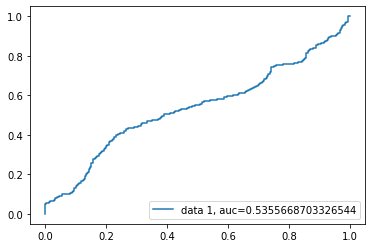

In [33]:
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()